<h1>Criminal Dataset</h1>


<p>Data period: [2015-01-02-2020-06-15]</p>
    
    
<p>Is dataset cleaned: True</p>

<p>To explore this dataset, first, I would like to group different questions we can answer:</p>

<ul>
<li>- 1. Are there any relationship between race and manner of death?</li>
<li>- 2. Is there more probabilities to die having a body camera?</li>
<li>- 3. Is there any coincidence to being shot for being black/gender</li>
<li>- 4. Are there a period when there are more criminal activity</li>
<li>- 5. States/Races with more criminal activity</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [21]:
cols_name = ["id","name","date","manner_of_death","armed","age","gender","race","city","state","signs_of_mental_illness","threat_level","flee","body_camera","arms_category"]
df = pd.read_csv("shootings.csv", usecols=cols_name, parse_dates=['date'])
df = df.drop(["id"], axis=1)

In [4]:
# We do not have any NaN value, the datased was cleansed before
df.isna().sum()

name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [105]:
df.head()
# print('=======')
# print(df.describe())
# print('=======')
# print(df.info())

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


<h2>Total shootings</h2>

In [86]:
total_shootings = df.count()[0]
total_shootings

4895

<h2>Percentage of incidents filmed</h2>

In [104]:
percent_incidents_filmed = df["body_camera"].sum() * 100 // total_shootings
print(str(percent_incidents_filmed) + '%')

11%


<h2>Criminal activity by year</h2>

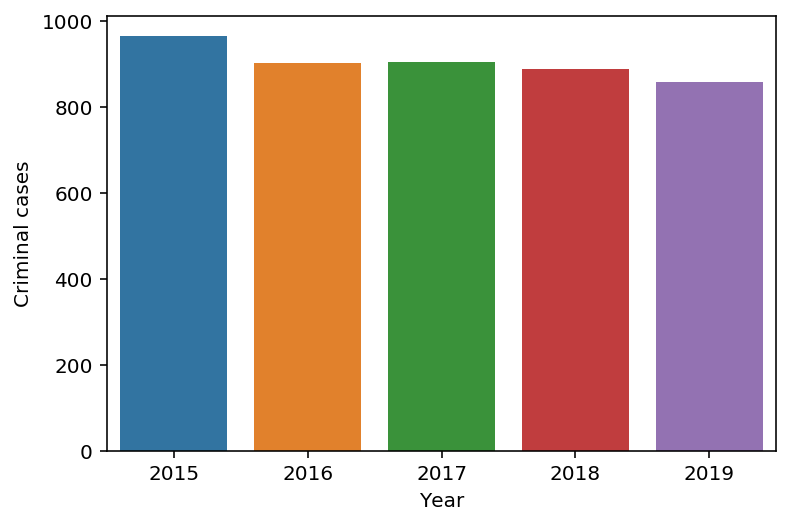

In [48]:
# Is there a year with more criminal activity since 5 years ago?

# Create a copy and get only entire years
ca_bytime = df.loc[:, 'date']
ca_bytime = ca_bytime.dt.year
ca_bytime = ca_bytime.loc[ca_bytime < 2020]

ax = sns.countplot(x=ca_bytime)
ax.set(xlabel='Year', ylabel='Criminal cases')
plt.show()
# ca_bytime.plot()

<h2>Criminal activity by month</h2>

In [54]:
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_byyear = df[['date']].copy()

# Process data
ca_byyear["year"] = ca_byyear["date"].dt.year
ca_byyear = ca_byyear.loc[ca_byyear["year"] < 2020] # Pull 2020 out
ca_byyear["month"] = ca_byyear["date"].dt.month
ca_byyear_plot = ca_byyear.groupby(["month", "year"]).count().unstack(level = 1)

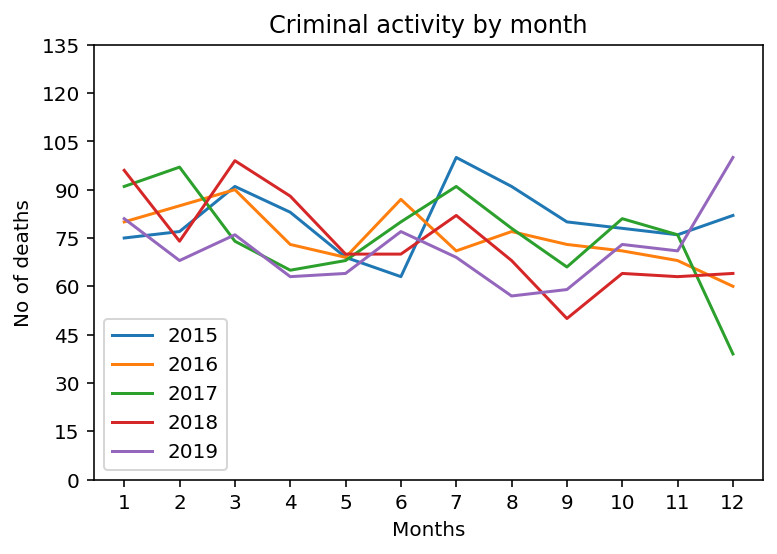

In [65]:
plt.plot(ca_byyear_plot)
plt.title("Criminal activity by month")
plt.xlabel("Months")
plt.ylabel("No of deaths") 
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0, 150, 15))
plt.legend(["2015","2016","2017","2018","2019","2020"])
plt.show()

<h2>Criminal activity by GENDER in months</h2>

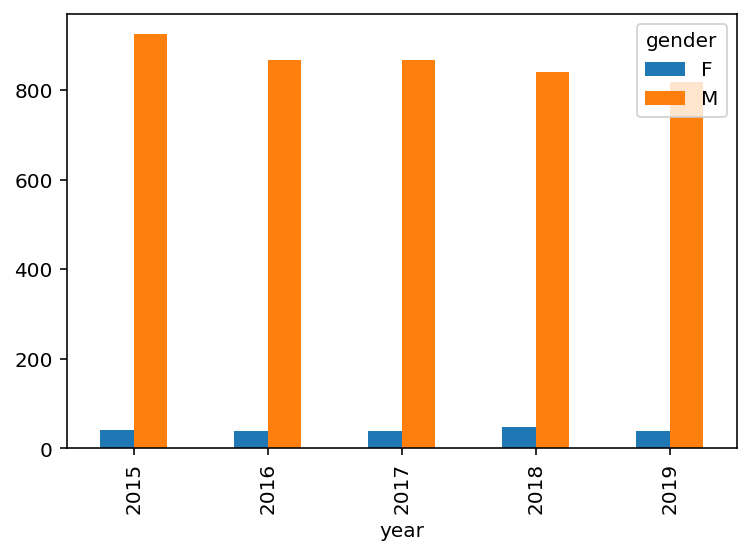

In [107]:
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_gender = df[['date', 'gender']].copy()

# Process data
ca_gender["year"] = ca_gender["date"].dt.year
ca_gender = ca_gender.loc[ca_gender["year"] < 2020] # Pull 2020 out

ca_gender_plot = ca_gender.groupby(["year"])["gender"].value_counts().unstack(level = 1)
# ca_gender_plot
ca_gender_plot.plot(kind="bar")

<h2>Criminal activity by races</h2>

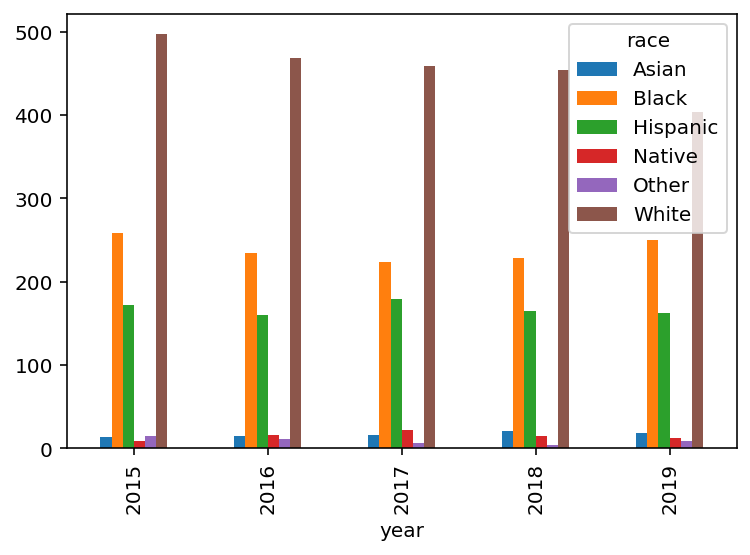

In [126]:
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_race = df[['date', 'race']].copy()

# Process data
ca_race["year"] = ca_race["date"].dt.year
ca_race = ca_race.loc[ca_race["year"] < 2020] # Pull 2020 out

ca_race_plot = ca_race.groupby(["year"])["race"].value_counts().unstack(level = 1)
# ca_gender_plot
ca_race_plot.plot(kind="bar")

<b>Criminal activity by gender in 2015</b>

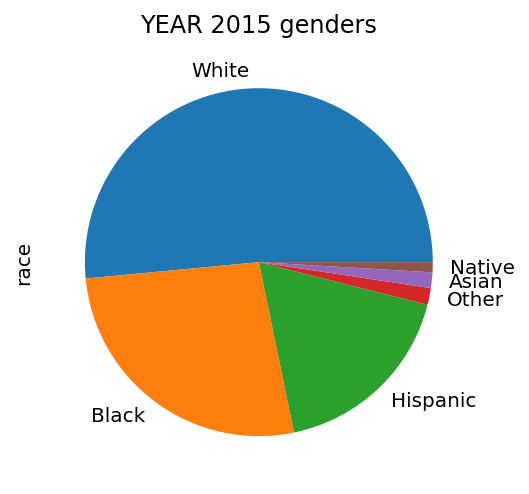

In [125]:
# YEAR 2015
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_gender_2015 = df[['date', 'race']].copy()

# Process data
ca_gender_2015["year"] = ca_gender_2015["date"].dt.year
ca_gender_2015 = ca_gender_2015.loc[ca_gender_2015["year"] == 2015]

ca_gender_2015_plot = ca_gender_2015["race"].value_counts()
# ca_gender_plot
plt.title("YEAR 2015 genders")
ca_gender_2015_plot.plot(kind="pie")

<h2>Criminal activity by LOCATION</h2>

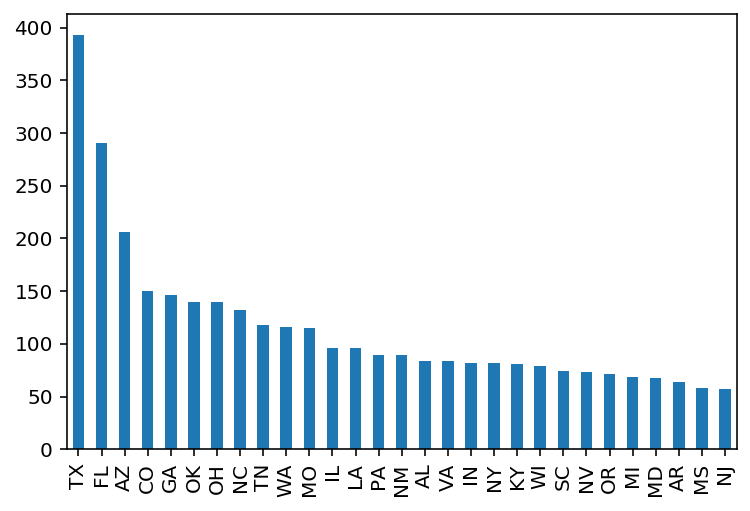

In [124]:
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_location = df[['date', 'state']].copy()

# Process data
ca_location["year"] = ca_location["date"].dt.year
ca_location = ca_location.loc[ca_location["year"] < 2020] # Pull 2020 out

ca_location_plot = ca_location["state"].value_counts()[1:30]
# ca_gender_plot
ca_location_plot.plot(kind="bar")

<b>Texas is the state with more criminal activity following, Florida</b>

<h2>Most of the suspects had</h2>

(-0.5, 511.5, 383.5, -0.5)

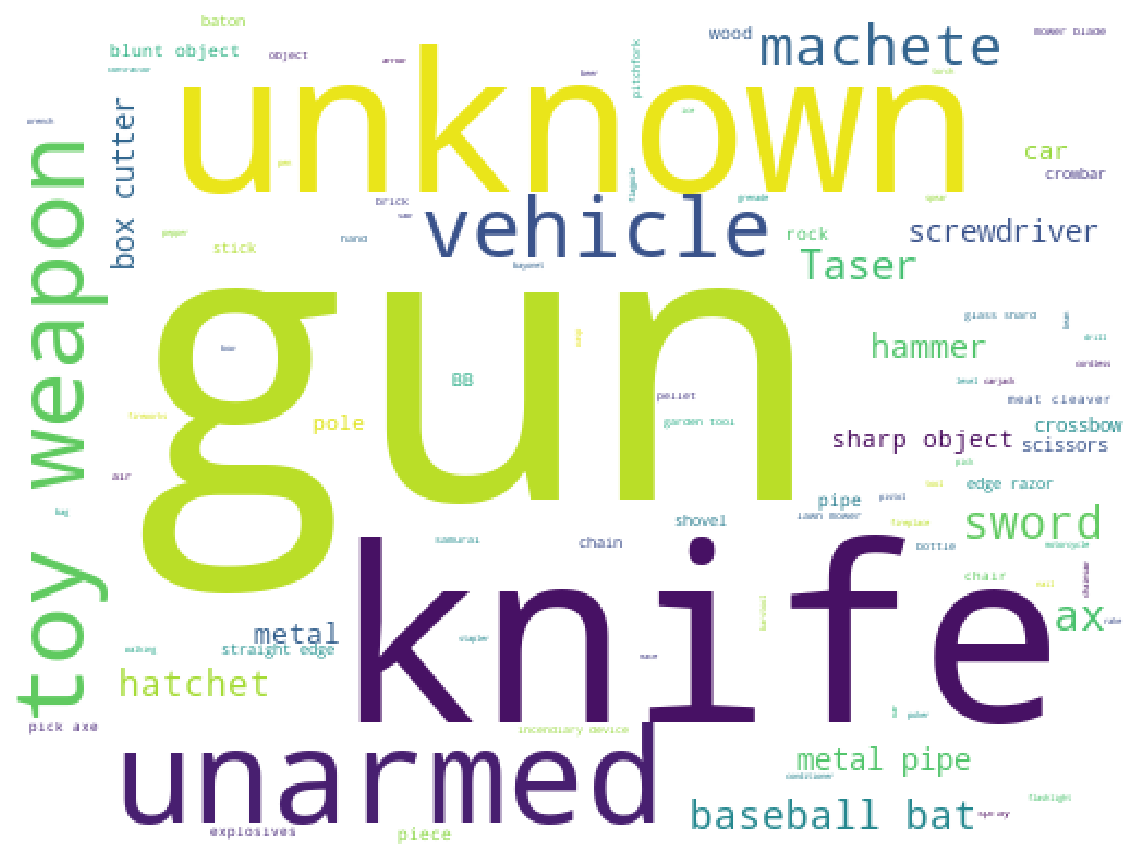

In [135]:
from wordcloud import WordCloud

ca_weapons = df[['date', 'armed']].copy()

# Process data
ca_weapons["year"] = ca_weapons["date"].dt.year
ca_weapons = ca_weapons.loc[ca_weapons["year"] < 2020]["armed"] # Pull 2020 out


plt.subplots(figsize=(10,19))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate(" ".join(list(ca_weapons))+" ")

plt.imshow(wordcloud)
plt.axis('off')
